### RMF Clustering
Estratégia para segmentar cliente

##### Dataset

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../dataframes/uen/df_cliente_setor_veiculo_radio.csv')


In [3]:
df.head(10)

,Data,Cliente,Setor,Veiculo,VL Tabela,Vl Bruto,Vl Liquido Final,IPCA BR,IPCA ES,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,PMC - Número-índice (2022=100) (Número-índice)/ BR,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR,Ocorrencias do cliente
0,2020-01-31,2WE COMERCIO E SERVICOS LTDA ME,SERVICOS,CBN VITORIA,3000.00,3000.00,2400.00,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1
1,2020-01-31,A F COMERCIO E TURISMO EIRELI,SERVICOS,LITORAL FM,1896.00,948.00,758.40,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1
2,2020-01-31,A. SCHMIDT COMERCIO DE OTICA LTDA ME,LOJA VAREJISTA/ATAC,LITORAL FM NOROESTE,7026.08,2700.00,2160.00,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1
3,2020-01-31,A.B. UTILIDADES - EIRELI - EPP,LOJA VAREJISTA/ATAC,LITORAL FM NORTE,5150.00,2195.00,1756.00,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1
4,2020-01-31,ABC BRINQUEDOS LTDA,LOJA VAREJISTA/ATAC,GAZETA FM LINHARES,1515.00,369.60,295.68,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1
5,2020-01-31,ABC BRINQUEDOS LTDA,LOJA VAREJISTA/ATAC,LITORAL FM NORTE,2225.60,967.76,774.21,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1
6,2020-01-31,ACEF S/A,CURSO APRENDIZAGEM,LITORAL FM,4256.00,4256.00,3404.80,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1
7,2020-01-31,ACQUA PISCINAS LTDA - ME,LOJA VAREJISTA/ATAC,LITORAL FM NOROESTE,2520.00,1260.00,1260.00,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1
8,2020-01-31,AEROPORTO VEICULOS LTDA,COMERC.P/ AUTOMOTIVO,CBN VITORIA,1049.81,1049.81,839.85,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1
9,2020-01-31,AG TELECOMUNICACOES LTDA - ME,PREST DE SERVICOS,LITORAL FM NOROESTE,1430.00,500.00,500.00,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1


In [4]:
#To calculate the Recency value, we need to find the last invoice date in our dataset.
df.Data.max()

'2024-06-30'

In [5]:
#Agregar por coluna de cliente e data so.
df.head()

,Data,Cliente,Setor,Veiculo,VL Tabela,Vl Bruto,Vl Liquido Final,IPCA BR,IPCA ES,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,PMC - Número-índice (2022=100) (Número-índice)/ BR,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR,Ocorrencias do cliente
0,2020-01-31,2WE COMERCIO E SERVICOS LTDA ME,SERVICOS,CBN VITORIA,3000.00,3000.0,2400.00,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1
1,2020-01-31,A F COMERCIO E TURISMO EIRELI,SERVICOS,LITORAL FM,1896.00,948.0,758.40,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1
2,2020-01-31,A. SCHMIDT COMERCIO DE OTICA LTDA ME,LOJA VAREJISTA/ATAC,LITORAL FM NOROESTE,7026.08,2700.0,2160.00,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1
3,2020-01-31,A.B. UTILIDADES - EIRELI - EPP,LOJA VAREJISTA/ATAC,LITORAL FM NORTE,5150.00,2195.0,1756.00,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1
4,2020-01-31,ABC BRINQUEDOS LTDA,LOJA VAREJISTA/ATAC,GAZETA FM LINHARES,1515.00,369.6,295.68,0.21,0.29,1.1,84.25384,95.01804,87.06581,97.86726,1


In [6]:
# Convertendo a coluna 'Data' para o formato de data, se necessário
#df['Data'] = pd.to_datetime(df['Data'])
#
## Definindo a coluna 'Data' como índice
#df.set_index('Data', inplace=True)

In [7]:
# Verificar os nomes das colunas
print(df.columns)

# Renomear a coluna 'Data', caso esteja incorreta
#df = df.rename(columns={'data_incorreta': 'Data'})

# Aplicar a transformação
df['Total Ocorrencias Cliente'] = df.groupby('Cliente')['Cliente'].transform('size')

# Realizar o agrupamento por Data e Cliente
df_cliente = df.groupby([pd.Grouper(key='Data', freq='M'), 'Cliente']).agg({
    'Vl Liquido Final': 'sum',
    'IPCA BR': 'mean',
    'IPCA ES': 'mean',
    'Taxa Ac. TRI % PIB': 'mean',
    'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)/ ES': 'mean',
    'Total Ocorrencias Cliente': 'count'
}).reset_index()

Index(['Data', 'Cliente', 'Setor', 'Veiculo', 'VL Tabela', 'Vl Bruto',
       'Vl Liquido Final', 'IPCA BR', 'IPCA ES', 'Taxa Ac. TRI % PIB',
       'PMC - Número-índice (2022=100) (Número-índice)/ ES',
       'PMC - Número-índice (2022=100) (Número-índice)/ BR',
       'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES',
       'PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR',
       'Ocorrencias do cliente'],
      dtype='object')


C:\Users\Raul\AppData\Local\Temp\ipykernel_8908\1346089182.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_cliente = df.groupby([pd.Grouper(key='Data', freq='M'), 'Cliente']).agg({


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [8]:
df['Data'] = pd.to_datetime(df['Data'])


In [9]:
df.set_index('Data', inplace=True)


In [10]:
df['Total Ocorrencias Cliente'] = df.groupby('Cliente')['Cliente'].transform('size')

df_cliente = df.groupby([pd.Grouper(freq='ME'), 'Cliente']).agg({
    'Vl Liquido Final': 'sum',
    'IPCA BR': 'mean',   # Média dos indicadores econômicos
    'IPCA ES': 'mean',
    'Taxa Ac. TRI % PIB': 'mean',
    'Total Ocorrencias Cliente': 'count'
}).reset_index()


In [11]:
df_cliente.shape

(15065, 7)

In [12]:
df_cliente.head()

,Data,Cliente,Vl Liquido Final,IPCA BR,IPCA ES,Taxa Ac. TRI % PIB,Total Ocorrencias Cliente
0,2020-01-31,2WE COMERCIO E SERVICOS LTDA ME,2400.00,0.21,0.29,1.1,1
1,2020-01-31,A F COMERCIO E TURISMO EIRELI,758.40,0.21,0.29,1.1,1
2,2020-01-31,A. SCHMIDT COMERCIO DE OTICA LTDA ME,2160.00,0.21,0.29,1.1,1
3,2020-01-31,A.B. UTILIDADES - EIRELI - EPP,1756.00,0.21,0.29,1.1,1
4,2020-01-31,ABC BRINQUEDOS LTDA,1069.89,0.21,0.29,1.1,2


In [13]:
df_cliente.Data.max()

Timestamp('2024-06-30 00:00:00')

In [14]:
import datetime as dt


##### RMF Segregate levels

In [15]:
pin_date = dt.datetime(2024, 6, 30)

In [16]:
df_cliente.head()

,Data,Cliente,Vl Liquido Final,IPCA BR,IPCA ES,Taxa Ac. TRI % PIB,Total Ocorrencias Cliente
0,2020-01-31,2WE COMERCIO E SERVICOS LTDA ME,2400.00,0.21,0.29,1.1,1
1,2020-01-31,A F COMERCIO E TURISMO EIRELI,758.40,0.21,0.29,1.1,1
2,2020-01-31,A. SCHMIDT COMERCIO DE OTICA LTDA ME,2160.00,0.21,0.29,1.1,1
3,2020-01-31,A.B. UTILIDADES - EIRELI - EPP,1756.00,0.21,0.29,1.1,1
4,2020-01-31,ABC BRINQUEDOS LTDA,1069.89,0.21,0.29,1.1,2


In [17]:
rfm = df_cliente.groupby('Cliente').agg({'Data': lambda Data: (pin_date - Data.max()).days,
                                     'Total Ocorrencias Cliente': lambda Invoice: Invoice.nunique(),
                                     'Vl Liquido Final': lambda Amount: Amount.sum()})

In [18]:
rfm.head()

,Data,Total Ocorrencias Cliente,Vl Liquido Final
Cliente,,,
2 IRMAOS COM. E ARTIGOS ESPORTIVOS LTDA,274,1,1270.0
28.882.427 JOSIEL DIAS ORNELAS,0,1,1439.1
2WE COMERCIO E SERVICOS LTDA ME,1583,1,4800.0
34.813.359 APARECIDA DA SILVA THOMAZ ADM,30,1,500.0
3X TELECOMUNICACOES LTDA,578,1,1200.0


In [19]:
rfm.columns = ['recency', 'frequency', 'monetary']
rfm = rfm[rfm["monetary"] > 0]
rfm.head()

,recency,frequency,monetary
Cliente,,,
2 IRMAOS COM. E ARTIGOS ESPORTIVOS LTDA,274,1,1270.0
28.882.427 JOSIEL DIAS ORNELAS,0,1,1439.1
2WE COMERCIO E SERVICOS LTDA ME,1583,1,4800.0
34.813.359 APARECIDA DA SILVA THOMAZ ADM,30,1,500.0
3X TELECOMUNICACOES LTDA,578,1,1200.0


In [20]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])


rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['score']=rfm['recency_score'].astype(int)+rfm['frequency_score'].astype(int)+rfm['monetary_score'].astype(int)

In [21]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score
Cliente,,,,,,,
2 IRMAOS COM. E ARTIGOS ESPORTIVOS LTDA,274,1,1270.0,4,1,1,6
28.882.427 JOSIEL DIAS ORNELAS,0,1,1439.1,5,1,2,8
2WE COMERCIO E SERVICOS LTDA ME,1583,1,4800.0,1,1,3,5
34.813.359 APARECIDA DA SILVA THOMAZ ADM,30,1,500.0,5,1,1,7
3X TELECOMUNICACOES LTDA,578,1,1200.0,3,1,1,5


In [22]:
rfm[rfm['score']== 15].sort_values('monetary', ascending=False).head()


,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score
Cliente,,,,,,,
SUPERINTENDENCIA ESTADUAL DE COMUNICACAO,0,5,2414294.64,5,5,5,15
BANESTES SA BANCO DO ESTADO DO ESPIRITO,0,8,1316714.27,5,5,5,15
MUNICIPIO DE VITORIA,0,4,980115.18,5,5,5,15
REALMAR DISTRIBUIDORA LTDA,0,7,681672.20,5,5,5,15
LOJAS SIPOLATTI COMERCIO E SERVICOS LTDA,0,5,573673.85,5,5,5,15


In [23]:
rfm[rfm['score']==15].count()
#There are 148 best clients in the company who are frequent buyers, and also generate high revenue

recency            147
frequency          147
monetary           147
recency_score      147
frequency_score    147
monetary_score     147
score              147
dtype: int64

In [24]:
def rfm_level(score):
    if  ((score >1) and (score < 4)):
        return 'Inactive'
    elif ((score >3) and (score < 8)):
        return 'Average'
    elif ((score > 7) and (score <11)):
        return 'Good'
    else:
        return 'Active'

In [25]:
rfm['level'] = rfm['score'].apply(lambda score : rfm_level(score))
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,level
Cliente,,,,,,,,
2 IRMAOS COM. E ARTIGOS ESPORTIVOS LTDA,274,1,1270.0,4,1,1,6,Average
28.882.427 JOSIEL DIAS ORNELAS,0,1,1439.1,5,1,2,8,Good
2WE COMERCIO E SERVICOS LTDA ME,1583,1,4800.0,1,1,3,5,Average
34.813.359 APARECIDA DA SILVA THOMAZ ADM,30,1,500.0,5,1,1,7,Average
3X TELECOMUNICACOES LTDA,578,1,1200.0,3,1,1,5,Average


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

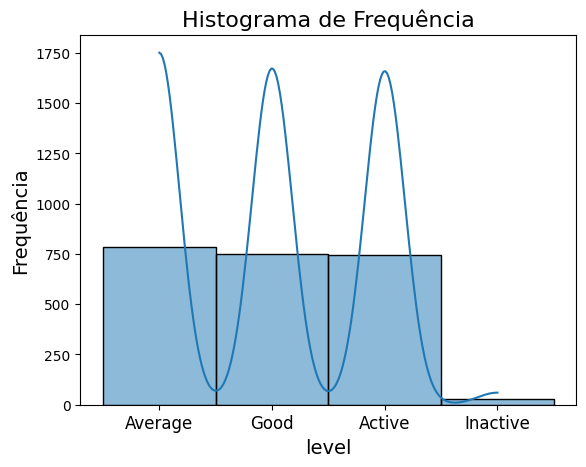

In [27]:
sns.histplot(rfm['level'], bins=30, kde=True)
sns.set_context("notebook", font_scale=1.5)
plt.title('Histograma de Frequência', fontsize = 16)
plt.xlabel('level',fontsize = 14)
plt.ylabel('Frequência',fontsize = 14)

plt.xticks(fontsize=12)  # Tamanho da fonte dos números no eixo X
plt.yticks(fontsize=10)  # Tamanho da fonte das strings no eixo Y

plt.show()

In [28]:
rfm.groupby('level').agg({
    'recency' : ['mean', 'min','max'],
    'frequency' : ['mean', 'min','max'],
    'monetary' : ['mean','min','max','count']
})

recency             frequency              monetary          \
                 mean   min   max      mean min max          mean     min   
level                                                                       
Active     218.818792     0  1277  2.097987   1   8  62407.575262  906.41   
Average    980.413486     0  1612  1.008906   1   2   2467.458003    2.00   
Good       545.528628     0  1612  1.174434   1   3   7507.898615   60.00   
Inactive  1357.925926  1096  1612  1.000000   1   1    699.100741  150.00   

                            
                 max count  
level                       
Active    2414294.64   745  
Average     18565.12   786  
Good       168699.76   751  
Inactive     1345.20    27

Active Customers
We can say that 745 customers bought 62.407,57 units by shopping 2.10 times approximately every 218.81 days.

They are previliged customers.

Surprise offers can be given on birthdays and anniversary.

Good Customers
We can say that 751 customers bought 7507.89 units by shopping 1.17 times approximately every 545.52 days.

Avarage Customers
We can say that 786 customers bought 2467.45 units by shopping 1.00 times approximately every 980.41 days.
Tiered pricing of products can be introduced.


Inactive Customers
We can say that 27 customers bought 699.10 units by shopping 1.00 times approximately every 1357.92 days

Personalised emails and SMS can be sent to the customers regarding the offers.
More marketing strategies can be introduced to improve the frequency of orders.

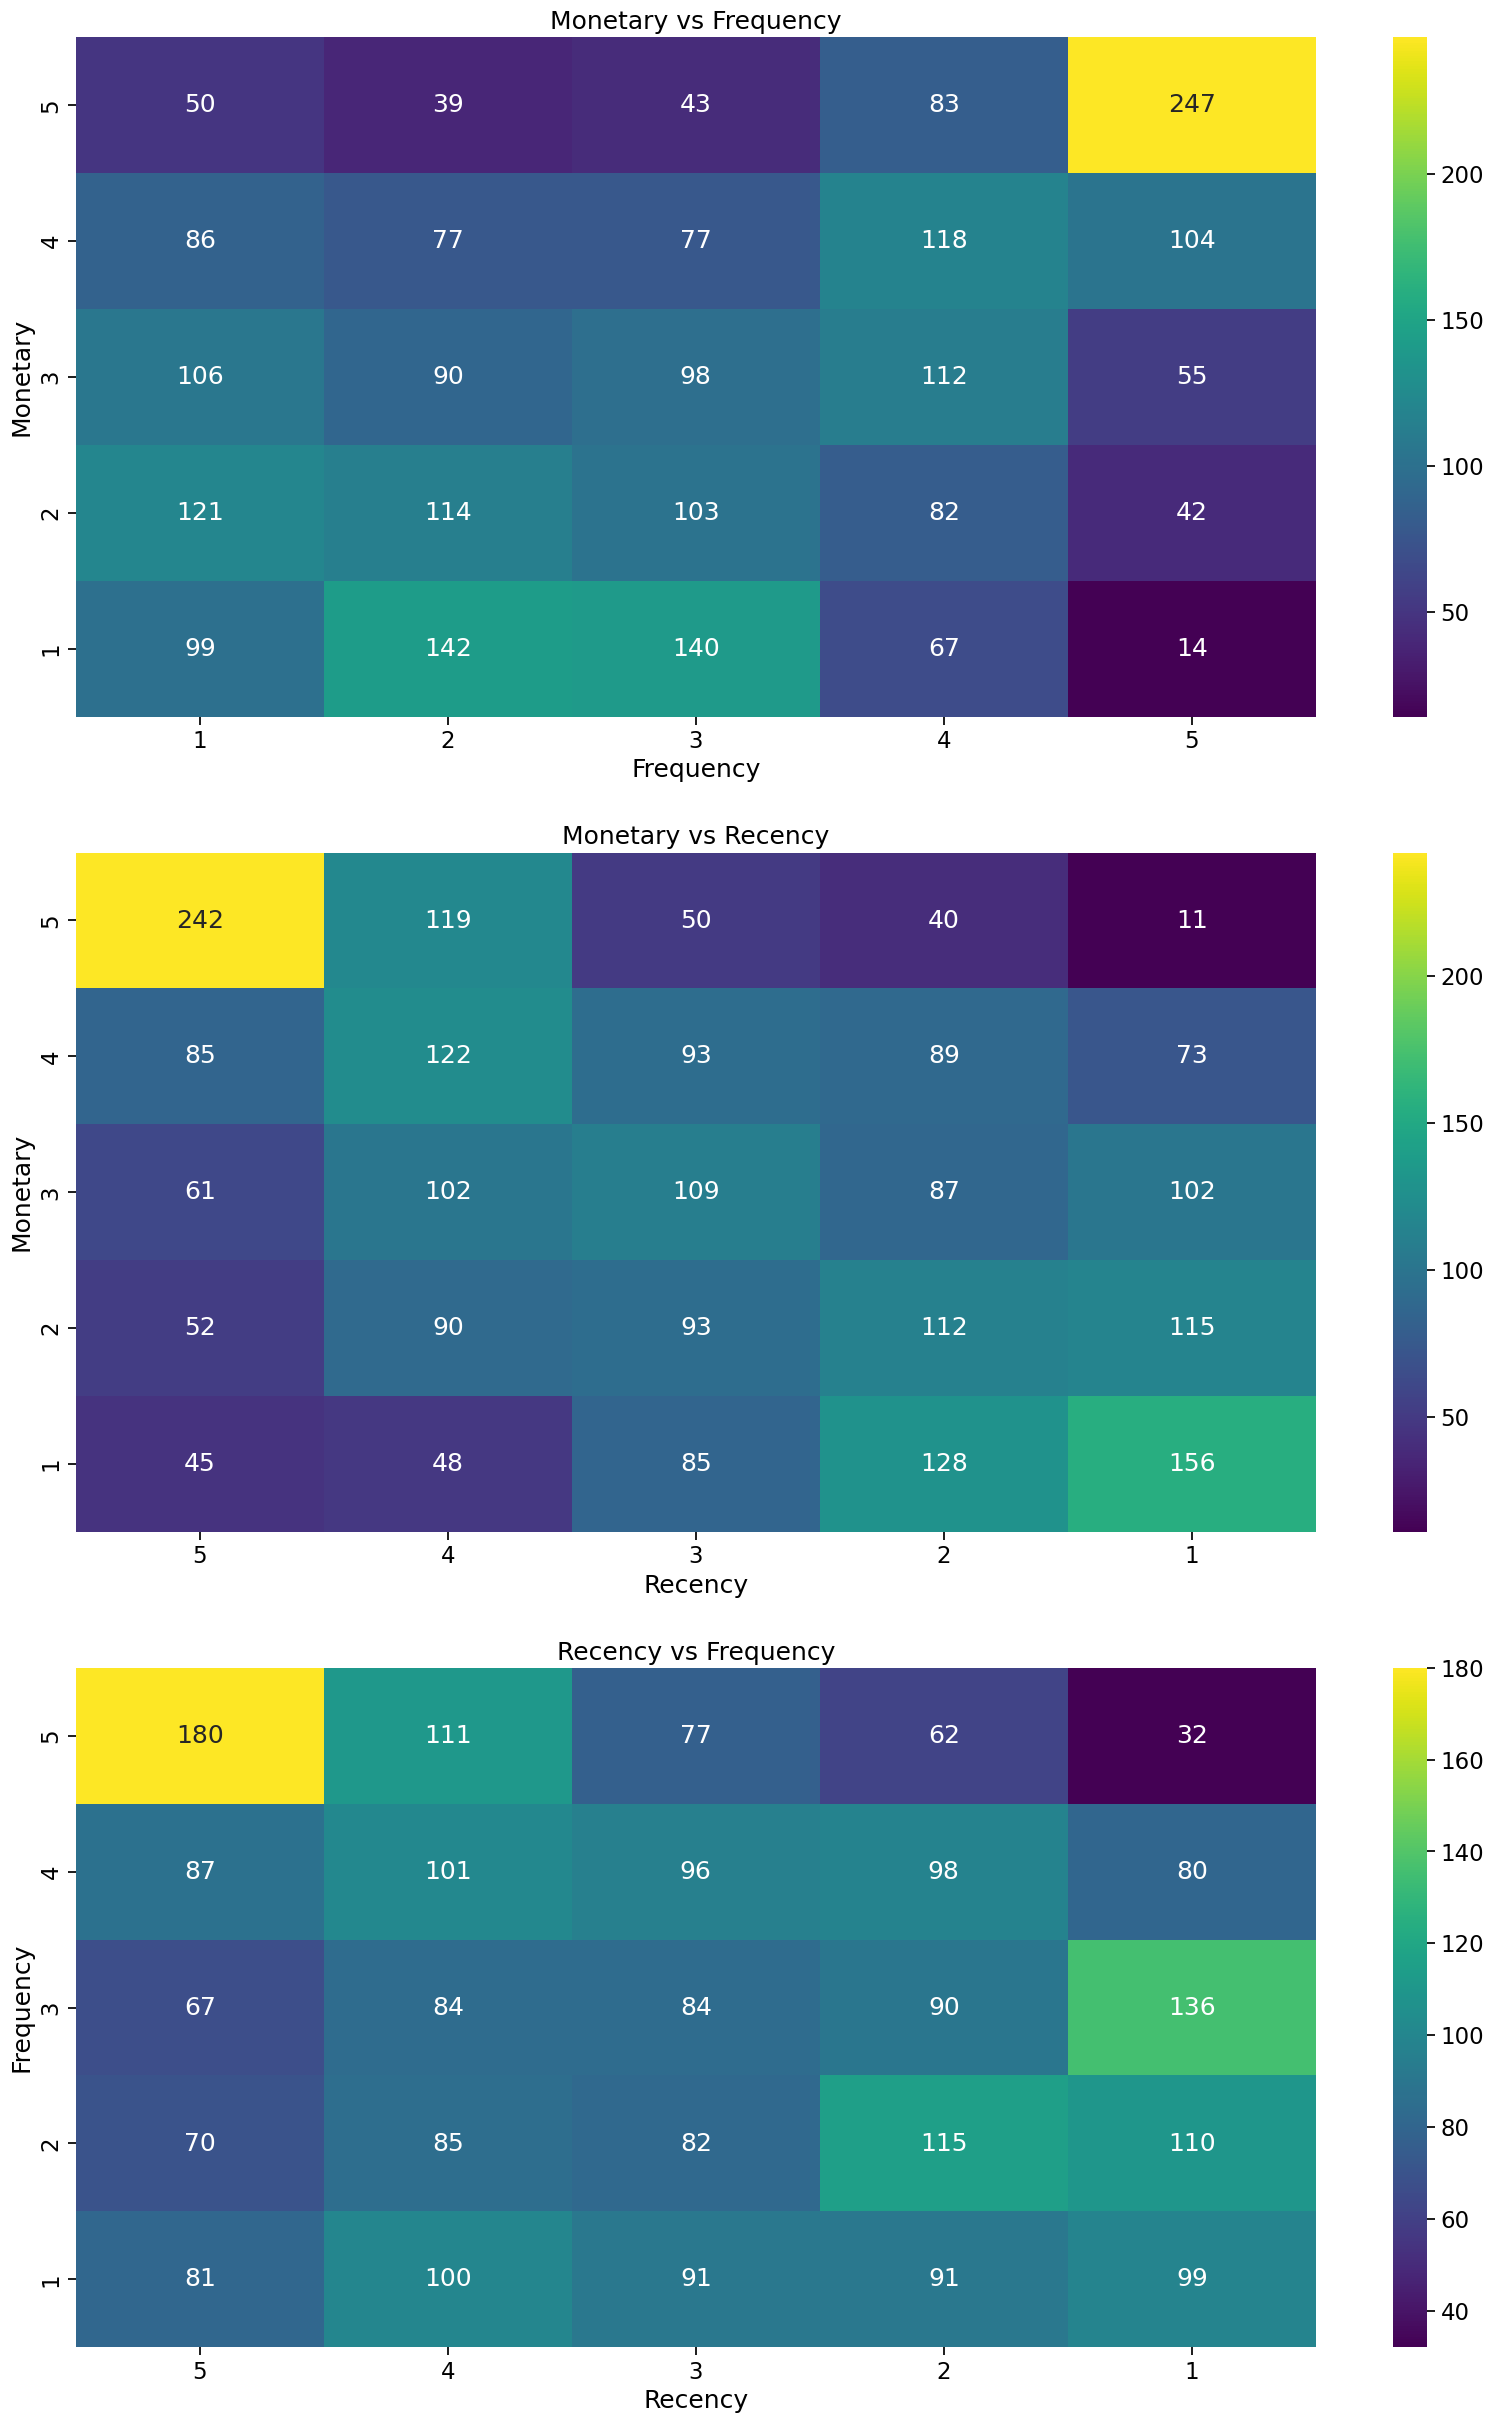

In [28]:
cross_table1 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['frequency_score'])
cross_table2 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['recency_score'])
cross_table3 = pd.crosstab(index=rfm['frequency_score'], columns=rfm['recency_score'])
plt.figure(figsize=(20,30))
plt.subplot(311)
ax1 = sns.heatmap(cross_table1, cmap='viridis', annot=True, fmt=".0f")
ax1.invert_yaxis()
ax1.set_ylabel('Monetary')
ax1.set_xlabel('Frequency')
ax1.set_title('Monetary vs Frequency')
plt.subplot(312)
ax2 = sns.heatmap(cross_table2, cmap='viridis', annot=True, fmt=".0f")
ax2.invert_yaxis()
ax2.set_ylabel('Monetary')
ax2.set_xlabel('Recency')
ax2.set_title('Monetary vs Recency')
plt.subplot(313)
ax3 = sns.heatmap(cross_table3, cmap='viridis', annot=True, fmt=".0f")
ax3.invert_yaxis()
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Recency')
ax3.set_title('Recency vs Frequency')
plt.show()

##### RMF Clustering

In [29]:
rfm.describe()

,recency,frequency,monetary,score
count,2309.000000,2309.000000,2.309000e+03,2309.000000
mean,597.653097,1.414032,2.342589e+04,9.035080
std,484.183606,0.860299,8.541344e+04,3.138358
min,0.000000,1.000000,2.000000e+00,3.000000
25%,151.000000,1.000000,1.750000e+03,7.000000
50%,547.000000,1.000000,5.000000e+03,9.000000
75%,973.000000,2.000000,1.469440e+04,11.000000
max,1612.000000,8.000000,2.414295e+06,15.000000


In [30]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,level
Cliente,,,,,,,,
2 IRMAOS COM. E ARTIGOS ESPORTIVOS LTDA,274,1,1270.0,4,1,1,6,Average
28.882.427 JOSIEL DIAS ORNELAS,0,1,1439.1,5,1,2,8,Good
2WE COMERCIO E SERVICOS LTDA ME,1583,1,4800.0,1,1,3,5,Average
34.813.359 APARECIDA DA SILVA THOMAZ ADM,30,1,500.0,5,1,1,7,Average
3X TELECOMUNICACOES LTDA,578,1,1200.0,3,1,1,5,Average


In [31]:
pip install scikit-learn yellowbrick


Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
rfm_standard_scaler=rfm[['recency','frequency','monetary']]
scaler = StandardScaler()
x_scaled=scaler.fit(rfm_standard_scaler)
x_scaled = scaler.fit_transform(rfm_standard_scaler)
x_scaled

array([[-0.66859596, -0.48136934, -0.25945197],
       [-1.23461957, -0.48136934, -0.25747176],
       [ 2.03550953, -0.48136934, -0.21811463],
       ...,
       [-0.66859596,  0.68126854, -0.2018139 ],
       [-0.85864769, -0.48136934,  0.29300426],
       [ 1.21746081, -0.48136934, -0.20219683]])

In [35]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [40]:
pip install setuptools


  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
Using cached setuptools-75.1.0-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [33]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

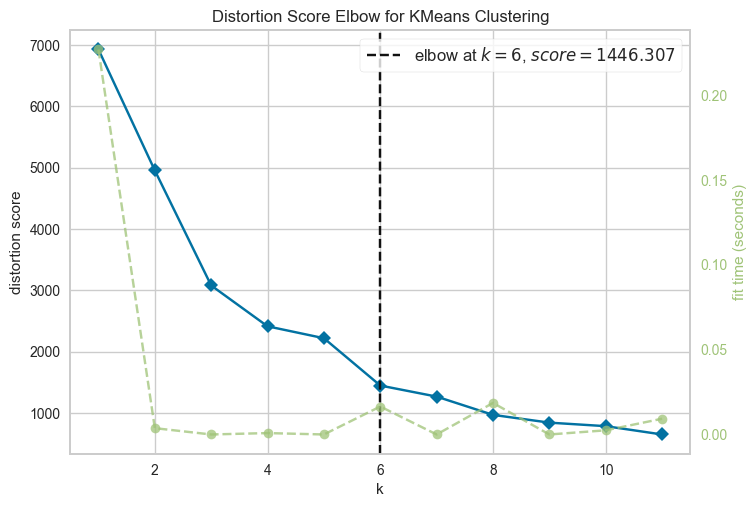

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(x_scaled)  
visualizer.show()  

[0 0 0 ... 0 3 0]
 Our cluster centers are as follows
[[-0.6007427   0.88510765  0.0768602 ]
 [ 1.17679894 -0.36657725 -0.21785802]
 [-0.58836949 -0.48136934 -0.1321628 ]
 [-1.23461957  4.16918218 27.9977782 ]
 [-1.10888245  3.70412702  7.63105423]
 [-0.86744049  3.64748569  1.55650778]]


,recency,frequency,monetary
cluster_pred,,,
0,462,462,462
1,790,790,790
2,963,963,963
3,1,1,1
4,15,15,15
5,78,78,78


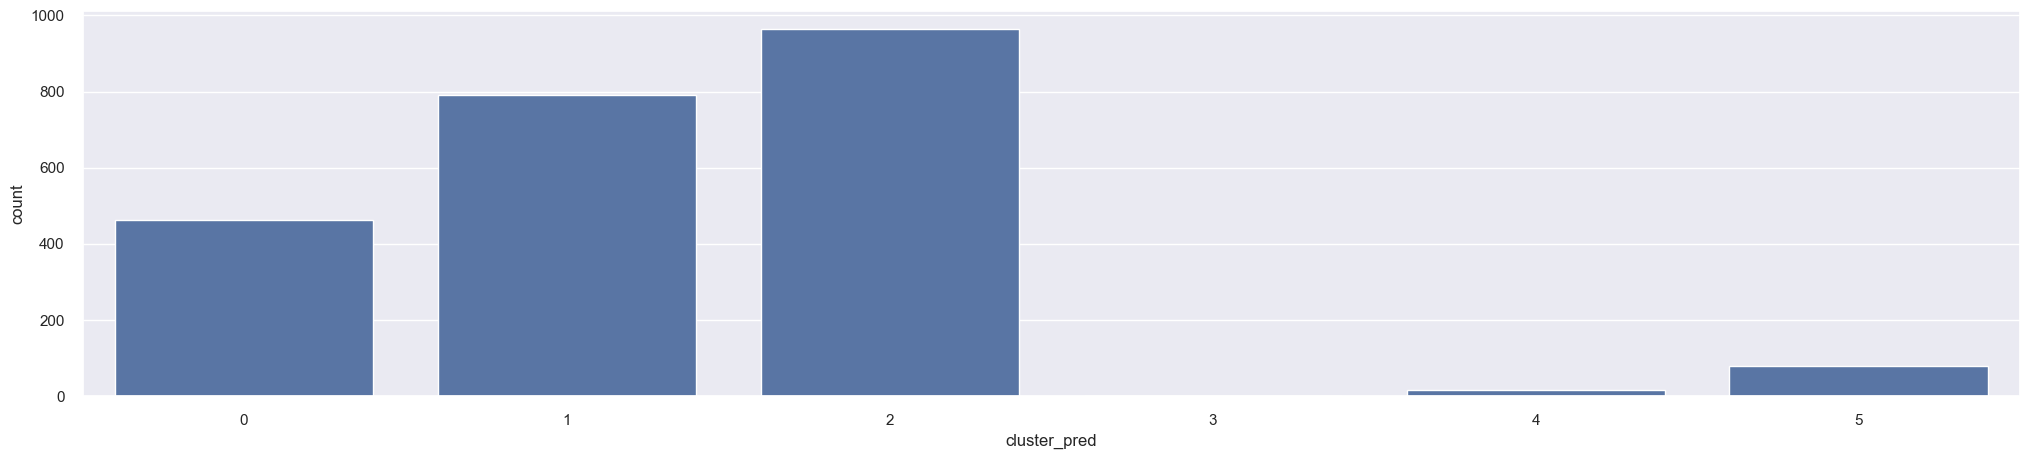

In [35]:
kmeans_scaled = KMeans(6)
kmeans_scaled.fit(x_scaled)
identified_clusters = kmeans_scaled.fit_predict(rfm_standard_scaler)
clusters_scaled = rfm_standard_scaler.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
print(identified_clusters)
sns.set(style="darkgrid")
print(" Our cluster centers are as follows")
print(kmeans_scaled.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

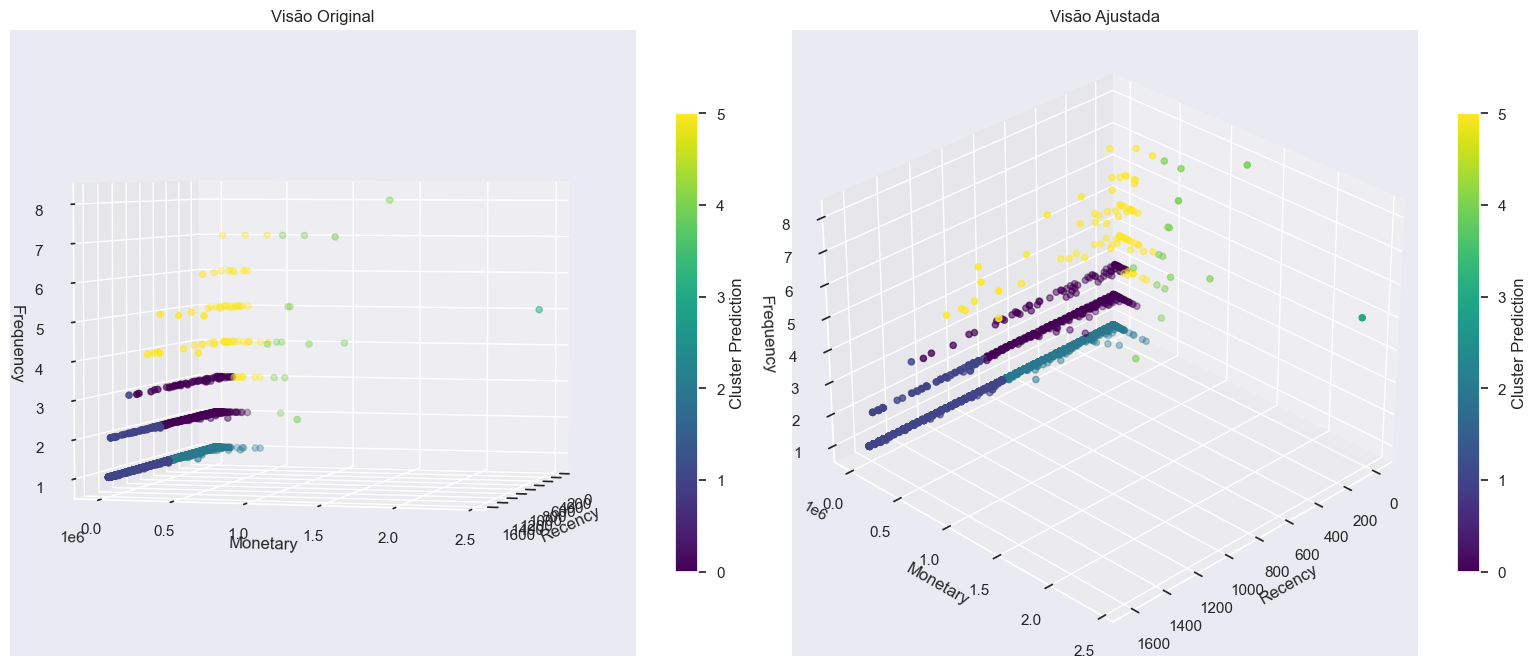

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Cria a figura e os subplots, com 1 linha e 2 colunas
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(16, 8))

# Dados dos eixos
xline = clusters_scaled['recency']
yline = clusters_scaled['frequency']
zline = clusters_scaled['monetary']

# Gráfico 1 (idêntico ao original)
scatter1 = ax1.scatter3D(xline, zline, yline, c=clusters_scaled['cluster_pred'], cmap='viridis')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Monetary')
ax1.set_zlabel('Frequency')
ax1.view_init(3, 15)  # Manter o ângulo de visão original
ax1.set_title('Visão Original')

# Gráfico 2 (com ângulo de visão alterado)
scatter2 = ax2.scatter3D(xline, zline, yline, c=clusters_scaled['cluster_pred'], cmap='viridis')
ax2.set_xlabel('Recency')
ax2.set_ylabel('Monetary')
ax2.set_zlabel('Frequency')
ax2.view_init(30, 45)  # Ângulo de visão ajustado para melhor visualização
ax2.set_title('Visão Ajustada')

# Adicionar barras de cores
cbar1 = fig.colorbar(scatter1, ax=ax1, shrink=0.6)
cbar1.set_label('Cluster Prediction')

cbar2 = fig.colorbar(scatter2, ax=ax2, shrink=0.6)
cbar2.set_label('Cluster Prediction')

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()


In [39]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x_scaled, identified_clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3736972468670965


In [40]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(x_scaled, identified_clusters)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Davies-Bouldin Index: 1.0647712270048175


In [41]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(x_scaled, identified_clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Calinski-Harabasz Index: 439.5530554972607


In [495]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [42]:
rfm_standard_scaler['cluster']= clusters_scaled['cluster_pred']
rfm_standard_scaler['level']=rfm['level']

rfm_standard_scaler.groupby('cluster').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})

C:\Users\Raul\AppData\Local\Temp\ipykernel_8908\2934273416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_standard_scaler['cluster']= clusters_scaled['cluster_pred']
C:\Users\Raul\AppData\Local\Temp\ipykernel_8908\2934273416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_standard_scaler['level']=rfm['level']


recency            frequency              monetary              \
                mean  min   max      mean min max          mean         min   
cluster                                                                       
0         306.846320    0  1277  2.175325   2   3  2.998936e+04      369.90   
1        1167.316456  761  1612  1.098734   1   3  4.821913e+03        2.00   
2         312.835929    0   731  1.000000   1   1  1.213985e+04       60.00   
3           0.000000    0     0  5.000000   5   5  2.414295e+06  2414294.64   
4          60.866667    0   366  4.600000   2   8  6.750793e+05   452424.00   
5         177.743590    0  1126  4.551282   3   7  1.563438e+05    14175.34   

                           
                max count  
cluster                    
0         264635.54   462  
1          68574.60   790  
2         346153.86   963  
3        2414294.64     1  
4        1316714.27    15  
5         408827.00    78

##### K means analisys

In [44]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,level
Cliente,,,,,,,,
2 IRMAOS COM. E ARTIGOS ESPORTIVOS LTDA,274,1,1270.0,4,1,1,6,Average
28.882.427 JOSIEL DIAS ORNELAS,0,1,1439.1,5,1,2,8,Good
2WE COMERCIO E SERVICOS LTDA ME,1583,1,4800.0,1,1,3,5,Average
34.813.359 APARECIDA DA SILVA THOMAZ ADM,30,1,500.0,5,1,1,7,Average
3X TELECOMUNICACOES LTDA,578,1,1200.0,3,1,1,5,Average


In [45]:
rfm_standard_scaler.head()

,recency,frequency,monetary,cluster,level
Cliente,,,,,
2 IRMAOS COM. E ARTIGOS ESPORTIVOS LTDA,274,1,1270.0,2,Average
28.882.427 JOSIEL DIAS ORNELAS,0,1,1439.1,2,Good
2WE COMERCIO E SERVICOS LTDA ME,1583,1,4800.0,1,Average
34.813.359 APARECIDA DA SILVA THOMAZ ADM,30,1,500.0,2,Average
3X TELECOMUNICACOES LTDA,578,1,1200.0,2,Average


In [46]:
rfm_standard_scaler.shape

(2309, 5)

##### Juntando na tabela original

In [47]:
rfm_standard_scaler = rfm_standard_scaler.reset_index().rename(columns={'index': 'Cliente'})


In [48]:
rfm_standard_scaler.head()

,Cliente,recency,frequency,monetary,cluster,level
0,2 IRMAOS COM. E ARTIGOS ESPORTIVOS LTDA,274,1,1270.0,2,Average
1,28.882.427 JOSIEL DIAS ORNELAS,0,1,1439.1,2,Good
2,2WE COMERCIO E SERVICOS LTDA ME,1583,1,4800.0,1,Average
3,34.813.359 APARECIDA DA SILVA THOMAZ ADM,30,1,500.0,2,Average
4,3X TELECOMUNICACOES LTDA,578,1,1200.0,2,Average


In [49]:
df_combinado = df.merge(rfm_standard_scaler[['Cliente', 'cluster']], on='Cliente', how='left')
df_combinado.sample(10)

,Cliente,Setor,Veiculo,VL Tabela,Vl Bruto,Vl Liquido Final,IPCA BR,IPCA ES,Taxa Ac. TRI % PIB,PMC - Número-índice (2022=100) (Número-índice)/ ES,PMC - Número-índice (2022=100) (Número-índice)/ BR,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ ES,PMC - Número-índice com ajuste sazonal (2022=100) (Número-índice)/ BR,Ocorrencias do cliente,Total Ocorrencias Cliente,cluster
1171,SIND.DOS TRABALHADORES NO COMERCIO E.ES.,PREST DE SERVICOS,LITORAL FM NORTE,304.00,217.66,217.66,0.07,0.12,1.1,80.76074,90.34239,83.15137,93.91747,1,5,1
21954,COOPERATIVA TRITICOLA SEPEENSE LTDA,LOJA VAREJISTA/ATAC,LITORAL FM,39241.80,20699.54,16559.63,0.21,0.05,2.5,NaN,NaN,NaN,NaN,1,66,5
19233,MINISTERIO DAS COMUNICACOES,SERVICOS PUBLICOS,GAZETA FM VITÓRIA,8589.20,5907.60,3780.86,0.28,0.40,2.9,120.25588,109.42362,114.10572,102.93200,1,70,5
14155,CASA DO SERRALHEIRO LTDA ME,LOJA VAREJISTA/ATAC,GAZETA FM LINHARES,617.50,497.88,398.30,0.62,0.65,3.0,122.54309,123.31739,100.47523,99.05430,1,74,5
3745,FORNECEDORA DALLA BERNARDINA LTDA,LOJA VAREJISTA/ATAC,LITORAL FM,3290.00,2632.00,2105.60,1.35,1.41,-3.3,115.25657,126.51201,94.04880,100.79572,1,125,5
12502,A4 PUBLICIDADE E MARKETING LTDA,PREST DE SERVICOS,CBN VITORIA,1372.00,687.50,687.50,-0.29,0.17,2.7,96.54468,97.04330,99.18491,100.61952,1,3,2
18174,F F TASSINARI,COMERC.P/ AUTOMOTIVO,LITORAL FM SUL,1662.72,1080.77,1080.77,0.26,0.42,3.1,99.14880,100.19568,100.43630,102.80546,1,3,2
17640,COMERCIAL CEREALISTA PRETTI LTDA,LOJA VAREJISTA/ATAC,PRODUCAO,300.00,300.00,240.00,0.23,0.31,3.1,105.32361,102.12442,103.33135,102.15386,1,72,0
20940,NOVA COMERCIO DE MOVEIS LTDA,LOJA VAREJISTA/ATAC,LITORAL FM SUL,353.22,229.59,183.67,0.16,0.05,2.5,103.20858,106.00817,103.42005,105.36516,1,20,0
866,ARCAR IDIOMAS LTDA,CURSO APRENDIZAGEM,LITORAL FM SUL,2124.00,1062.00,849.60,0.07,0.12,1.1,80.76074,90.34239,83.15137,93.91747,1,9,2
